In [4]:
import glob
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
files = glob.glob('*.{}'.format('csv'))
print(files)

['IDFC-Institute_mumbai-covid-data__data_mumbai_c19_cases_severity_and_contact_tracing-csv__15_05_2022.csv', 'IDFC-Institute_mumbai-covid-data__data_mumbai_c19_containment_by_ward-csv__15_05_2022.csv', 'IDFC-Institute_mumbai-covid-data__data_mumbai_c19_hospital_occupancy_by_bed_type-csv__15_05_2022.csv', 'IDFC-Institute_mumbai-covid-data__data_mumbai_c19_priv_hospital_occupancy_by_bed_type-csv__15_05_2022.csv', 'IDFC-Institute_mumbai-covid-data__data_mumbai_c19_tests_by_type-csv__15_05_2022.csv']


# Load all required files

In [158]:
bed_occupancy_df = pd.read_csv('IDFC-Institute_mumbai-covid-data__data_mumbai_c19_hospital_occupancy_by_bed_type-csv__15_05_2022.csv')
bed_occupancy_df['Date'] = pd.to_datetime(bed_occupancy_df['Date'])
bed_occupancy_df.head(2)

,Date,Total_Bed_Capacity,Total_Beds_Occupancy,DCH & DCHC_ Bed_Capacity,DCH & DCHC_ Beds_Occupancy,CCC2_Active_Bed_Capacity,CCC2_Active_Bed_Occupancy,ICU_Bed_Capacity,ICU_Beds_Occupancy,O2_Bed_Capacity,O2_Beds_Occupancy,Ventilator_Bed_Capacity,Ventilator_Beds_Occupancy
0,2020-06-07,17936.0,13739.0,10531.0,9227.0,7405.0,4512.0,1157.0,1141.0,5114.0,3760.0,476.0,446.0
1,2020-06-08,18110.0,13759.0,10702.0,9278.0,7408.0,4481.0,1164.0,1154.0,5946.0,4532.0,493.0,471.0


In [103]:
pvt_bed_occupancy_df = pd.read_csv('IDFC-Institute_mumbai-covid-data__data_mumbai_c19_priv_hospital_occupancy_by_bed_type-csv__15_05_2022.csv')
pvt_bed_occupancy_df['Date'] = pd.to_datetime(pvt_bed_occupancy_df['Date'])
pvt_bed_occupancy_df.head(2)

,Date,Private_hosp_total_beds_capacity,Private_hosp_ICU_beds_capacity,Private_hosp_normal_beds_capacity,Private_hosp_O2_beds_capacity,Private_hosp_ventilator_beds_capacity,Private_hosp_total_beds_occupancy,Private_hosp_ICU_beds_occupancy,Private_hosp_normal_beds_occupancy,Private_hosp_O2_beds_occupancy,Private_hosp_ventilator_beds_occupancy
0,2020-07-13,4889.0,942.0,3947.0,2885.0,449.0,3935.0,848.0,3087.0,2388.0,427.0
1,2020-07-14,4896.0,942.0,3954.0,2892.0,449.0,3886.0,863.0,3023.0,2366.0,429.0


In [104]:
tests_df = pd.read_csv('IDFC-Institute_mumbai-covid-data__data_mumbai_c19_tests_by_type-csv__15_05_2022.csv')
tests_df.Date = pd.to_datetime(tests_df.Date)
tests_df.head(2)

,Date,Total_positive_tests,Total_tests,Num_of_RTPCR_tests_1000s,Num_of_antigen_tests_1000s,Total_tests_1000s
0,2020-04-30,409.0,4310.0,NaN,NaN,NaN
1,2020-05-01,538.0,4087.0,NaN,NaN,NaN


In [159]:
bed_occupancy_df['non_ICU_Bed_Capacity'] = bed_occupancy_df['O2_Bed_Capacity']-bed_occupancy_df['ICU_Bed_Capacity']

# Bed capacity analysis

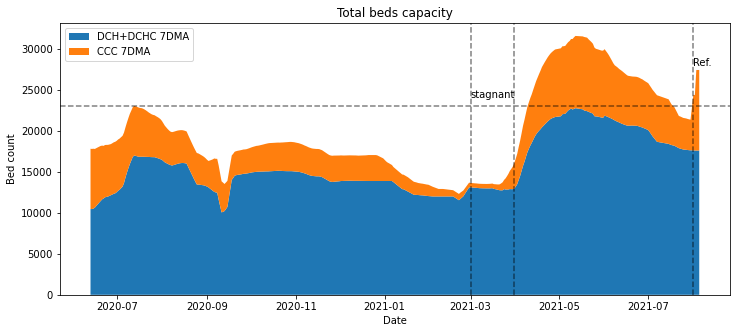

In [184]:
import datetime
fig, axs = plt.subplots(figsize=(12,5))
x = bed_occupancy_df.Date
y = bed_occupancy_df[['DCH & DCHC_ Bed_Capacity','CCC2_Active_Bed_Capacity']].interpolate().rolling(7).mean().T
plt.stackplot(x,y,labels=['DCH+DCHC 7DMA','CCC 7DMA'])
plt.legend(loc='upper left')
plt.title('Total beds capacity')
axs.set_xlabel('Date')
axs.set_ylabel('Bed count')
axs.axhline(y=23000,color='black',linestyle='--', alpha=0.5)
axs.axvline(x=datetime.datetime(2021,3,1),color='black',linestyle='--', alpha=0.5)
axs.axvline(x=datetime.datetime(2021,3,31),color='black',linestyle='--', alpha=0.5)
axs.axvline(x=datetime.datetime(2021,8,1),color='black',linestyle='--', alpha=0.5)
plt.annotate('stagnant',xy=(datetime.datetime(2021,3,1),24000))
plt.annotate('Ref.',xy=(datetime.datetime(2021,8,1),28000))
plt.show()

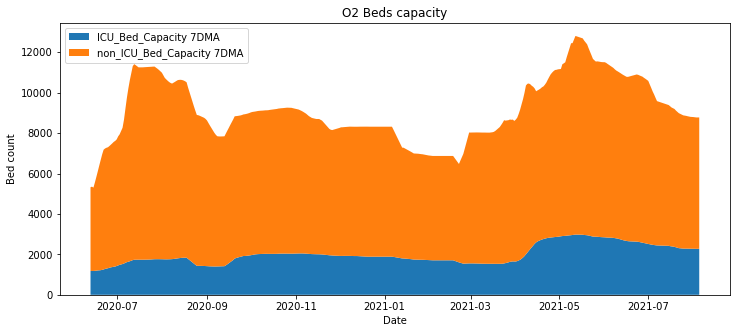

In [185]:
fig, axs = plt.subplots(figsize=(12,5))
x = bed_occupancy_df.Date
y = bed_occupancy_df[['ICU_Bed_Capacity','non_ICU_Bed_Capacity']].interpolate().rolling(7).mean().T
plt.stackplot(x,y,labels=['ICU_Bed_Capacity 7DMA','non_ICU_Bed_Capacity 7DMA'])
plt.legend(loc='upper left')
plt.title('O2 Beds capacity')
axs.set_xlabel('Date')
axs.set_ylabel('Bed count')
plt.show()

C:\Users\SAIKRI~1\AppData\Local\Temp/ipykernel_2612/4028937447.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  comp[['Public bed capacity (d-o-d % change)','Private bed capacity (d-o-d % change)']]['2021'].rolling(7).mean().plot(ax=axs)


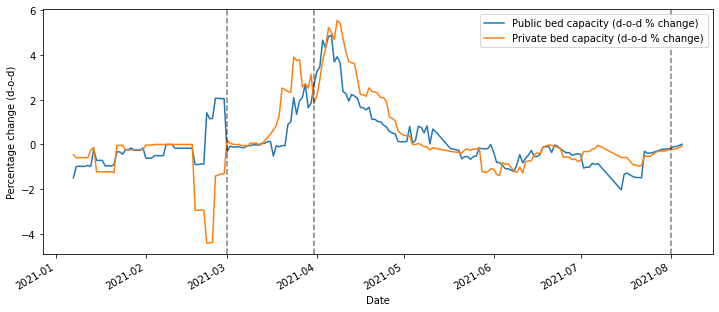

In [204]:
fig, axs = plt.subplots(figsize=(12,5))
comp = bed_occupancy_df[['Date','Total_Bed_Capacity']].merge(pvt_bed_occupancy_df[['Date','Private_hosp_total_beds_capacity']],on='Date').set_index('Date').interpolate()
comp["Public bed capacity (d-o-d % change)"] = comp["Total_Bed_Capacity"].pct_change().mul(100)
comp["Private bed capacity (d-o-d % change)"] = comp["Private_hosp_total_beds_capacity"].pct_change().mul(100)
comp[['Public bed capacity (d-o-d % change)','Private bed capacity (d-o-d % change)']]['2021'].rolling(7).mean().plot(ax=axs)
axs.set_xlabel('Date')
axs.set_ylabel('Percentage change (d-o-d)')
axs.axvline(x=datetime.datetime(2021,3,1),color='black',linestyle='--', alpha=0.5)
axs.axvline(x=datetime.datetime(2021,3,31),color='black',linestyle='--', alpha=0.5)
axs.axvline(x=datetime.datetime(2021,8,1),color='black',linestyle='--', alpha=0.5)

plt.show()

C:\Users\SAIKRI~1\AppData\Local\Temp/ipykernel_2612/1132771483.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  comp[['Public ICU capacity (d-o-d % change)','Private ICU capacity (d-o-d % change)']]['2021'].rolling(7).mean().plot(ax=axs)


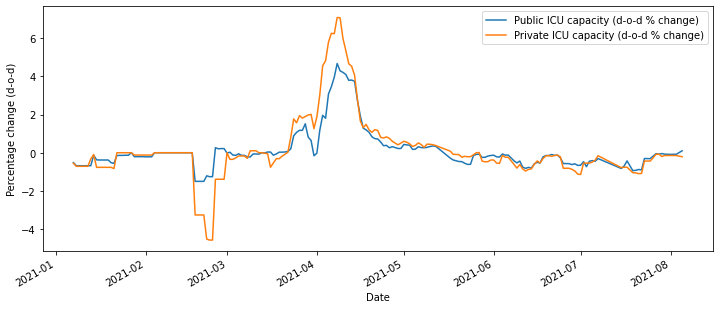

In [207]:
fig, axs = plt.subplots(figsize=(12,5))
comp = bed_occupancy_df[['Date','ICU_Bed_Capacity']].merge(pvt_bed_occupancy_df[['Date','Private_hosp_ICU_beds_capacity']],on='Date').set_index('Date').interpolate()
comp["Public ICU capacity (d-o-d % change)"] = comp["ICU_Bed_Capacity"].pct_change().mul(100)
comp["Private ICU capacity (d-o-d % change)"] = comp["Private_hosp_ICU_beds_capacity"].pct_change().mul(100)
comp[['Public ICU capacity (d-o-d % change)','Private ICU capacity (d-o-d % change)']]['2021'].rolling(7).mean().plot(ax=axs)
axs.set_xlabel('Date')
axs.set_ylabel('Percentage change (d-o-d)')
plt.show()

# TPR and Bed Occupancy -- reproducing results -- already analysed by IDFC Institute

In [111]:
df = bed_occupancy_df.merge(tests_df[['Date','Total_positive_tests','Total_tests']],on='Date')

In [112]:
df.head(2)

,Date,Total_Bed_Capacity,Total_Beds_Occupancy,DCH & DCHC_ Bed_Capacity,DCH & DCHC_ Beds_Occupancy,CCC2_Active_Bed_Capacity,CCC2_Active_Bed_Occupancy,ICU_Bed_Capacity,ICU_Beds_Occupancy,O2_Bed_Capacity,O2_Beds_Occupancy,Ventilator_Bed_Capacity,Ventilator_Beds_Occupancy,non_ICU_Bed_Capacity,Total_positive_tests,Total_tests
0,2020-06-07,17936.0,13739.0,10531.0,9227.0,7405.0,4512.0,1157.0,1141.0,5114.0,3760.0,476.0,446.0,3957.0,1385.0,4954.0
1,2020-06-08,18110.0,13759.0,10702.0,9278.0,7408.0,4481.0,1164.0,1154.0,5946.0,4532.0,493.0,471.0,4782.0,1294.0,3671.0


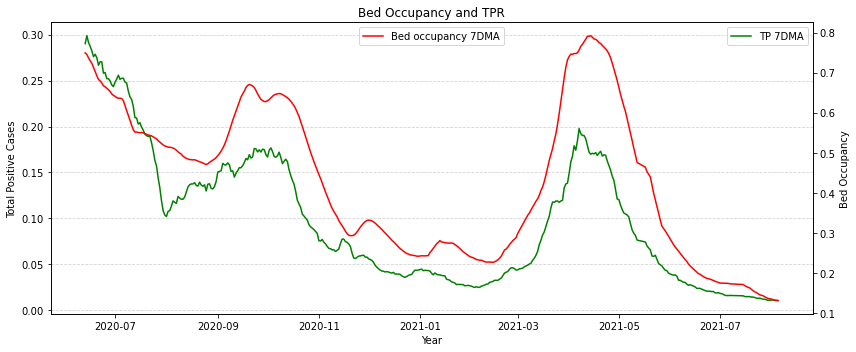

In [113]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Bed Occupancy and TPR')
ax.set_xlabel('Year')
ax.plot(df['Date'],(df['Total_positive_tests']/df['Total_tests']).interpolate().rolling(7).mean(), color='green')
ax2.plot(df['Date'], (df['Total_Beds_Occupancy']/df['Total_Bed_Capacity']).interpolate().rolling(7).mean(), color='red')

ax.set_ylabel('Total Positive Cases')
ax2.set_ylabel('Bed Occupancy')
ax.legend(['TP 7DMA'])
ax2.legend(['Bed occupancy 7DMA'], loc='upper center')
#ax.set_xticks(df['Date'].dt.date)
#ax.set_xticklabels(df['Date'].dt.year, rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

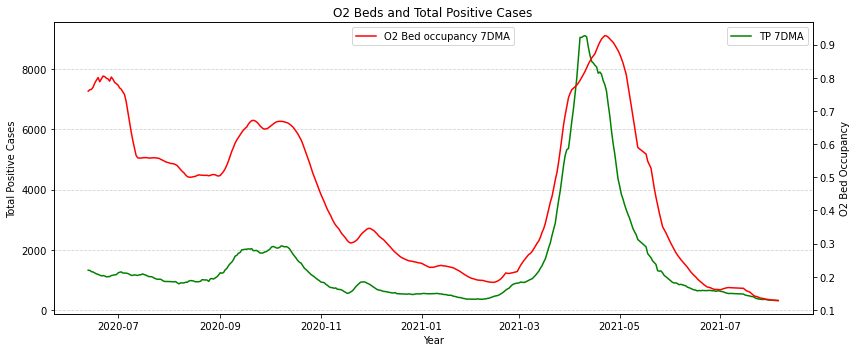

In [114]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('O2 Beds and Total Positive Cases')
ax.set_xlabel('Year')
ax.plot(df['Date'],(df['Total_positive_tests']).interpolate().rolling(7).mean(), color='green')
ax2.plot(df['Date'], (df['O2_Beds_Occupancy']/df['O2_Bed_Capacity']).interpolate().rolling(7).mean(), color='red')

ax.set_ylabel('Total Positive Cases')
ax2.set_ylabel('O2 Bed Occupancy')
ax.legend(['TP 7DMA'])
ax2.legend(['O2 Bed occupancy 7DMA'], loc='upper center')
#ax.set_xticks(df['Date'].dt.date)
#ax.set_xticklabels(df['Date'].dt.year, rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

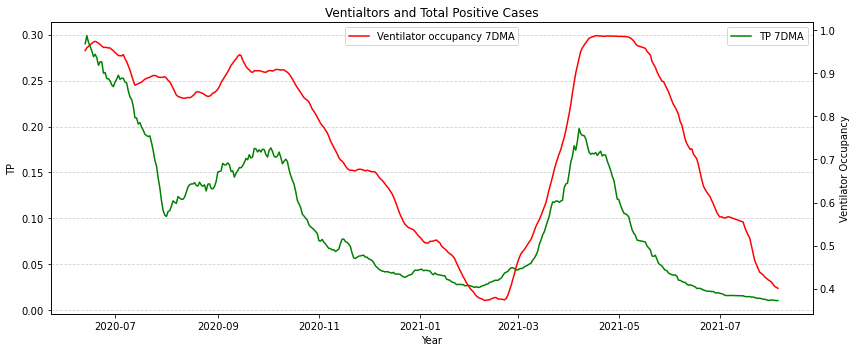

In [115]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Ventialtors and Total Positive Cases')
ax.set_xlabel('Year')
ax.plot(df['Date'],(df['Total_positive_tests']/df['Total_tests']).interpolate().rolling(7).mean(), color='green')
ax2.plot(df['Date'], (df['Ventilator_Beds_Occupancy']/df['Ventilator_Bed_Capacity']).interpolate().rolling(7).mean(), color='red')

ax.set_ylabel('TP')
ax2.set_ylabel('Ventilator Occupancy')
ax.legend(['TP 7DMA'])
ax2.legend(['Ventilator occupancy 7DMA'], loc='upper center')
#ax.set_xticks(df['Date'].dt.date)
#ax.set_xticklabels(df['Date'].dt.year, rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

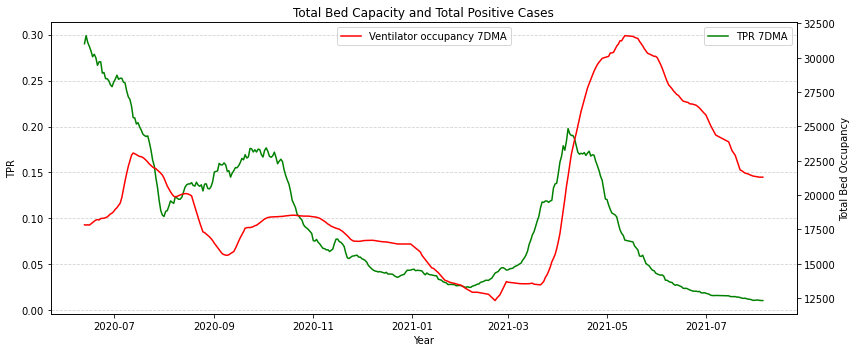

In [116]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Total Bed Capacity and Total Positive Cases')
ax.set_xlabel('Year')
ax.plot(df['Date'],(df['Total_positive_tests']/df['Total_tests']).interpolate().rolling(7).mean(), color='green')
ax2.plot(df['Date'], (df['Total_Bed_Capacity']).interpolate().rolling(7).mean(), color='red')

ax.set_ylabel('TPR')
ax2.set_ylabel('Total Bed Occupancy')
ax.legend(['TPR 7DMA'])
ax2.legend(['Ventilator occupancy 7DMA'], loc='upper center')
#ax.set_xticks(df['Date'].dt.date)
#ax.set_xticklabels(df['Date'].dt.year, rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [117]:
df = df.set_index('Date')
df.head()

,Total_Bed_Capacity,Total_Beds_Occupancy,DCH & DCHC_ Bed_Capacity,DCH & DCHC_ Beds_Occupancy,CCC2_Active_Bed_Capacity,CCC2_Active_Bed_Occupancy,ICU_Bed_Capacity,ICU_Beds_Occupancy,O2_Bed_Capacity,O2_Beds_Occupancy,Ventilator_Bed_Capacity,Ventilator_Beds_Occupancy,non_ICU_Bed_Capacity,Total_positive_tests,Total_tests
Date,,,,,,,,,,,,,,,
2020-06-07,17936.0,13739.0,10531.0,9227.0,7405.0,4512.0,1157.0,1141.0,5114.0,3760.0,476.0,446.0,3957.0,1385.0,4954.0
2020-06-08,18110.0,13759.0,10702.0,9278.0,7408.0,4481.0,1164.0,1154.0,5946.0,4532.0,493.0,471.0,4782.0,1294.0,3671.0
2020-06-09,17835.0,13390.0,10314.0,9065.0,7521.0,4325.0,1158.0,1142.0,5181.0,3948.0,503.0,481.0,4023.0,999.0,4720.0
2020-06-10,17617.0,13143.0,10338.0,9030.0,7279.0,4113.0,1163.0,1152.0,5202.0,3905.0,507.0,483.0,4039.0,1505.0,4633.0
2020-06-11,17732.0,13146.0,10450.0,9098.0,7282.0,4048.0,1181.0,1167.0,5260.0,3986.0,530.0,497.0,4079.0,1458.0,4773.0


In [120]:
master_df = pd.DataFrame(pd.date_range(start='2020-06-07', end='2021-08-05', freq='D'))
master_df.columns=['Date']

In [121]:
master_df = master_df.merge(df.reset_index(),on='Date',how='outer').set_index('Date')
master_df = master_df.interpolate()

In [ ]:
master_df.merge(case_load_df[['Date','Stable_Symptomatic','Critical']],on='Date',how='left').drop_duplicates().to_csv('master1.csv',index=False)

# Time Series - SARIMA - FAIL

In [122]:
df_train = master_df[:'2021-03']
df_test = master_df['2021-04':]

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

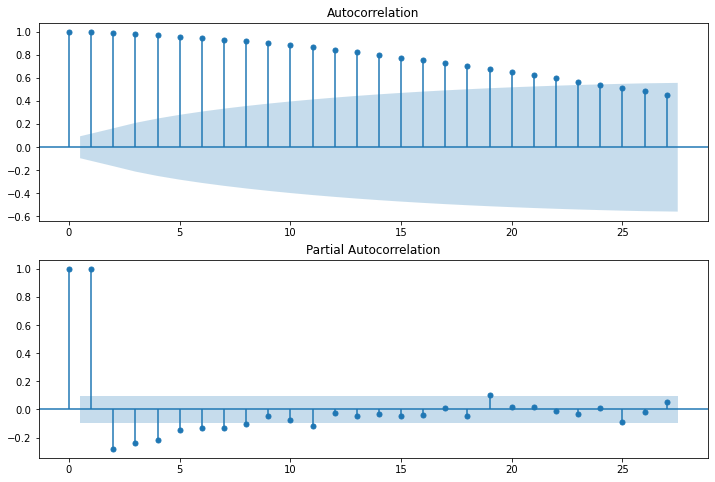

In [124]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
axs = axs.flatten()

fig = plot_acf(master_df['Total_Beds_Occupancy'].interpolate().dropna(), ax=axs[0])
fig = plot_pacf(master_df['Total_Beds_Occupancy'].interpolate().dropna(), ax=axs[1])

plt.show()

In [125]:
model = sm.tsa.statespace.SARIMAX(df_train['Total_Beds_Occupancy'],
                                  exog = df_train['Total_positive_tests'],
                                     order=(1,1,1))
model = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [126]:
arimax_results = df_test.reset_index().copy()
arimax_results['Total_Beds_Occupancy'] = 0

In [127]:
exog_test = df_test['Total_positive_tests']
fcst = model.predict(start='2021-04-01', end='2021-08-05', dynamic=True, exog=exog_test)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [128]:
fcst

2021-04-01    13665.443987
2021-04-02    14042.588899
2021-04-03    14402.974053
2021-04-04    14783.063487
2021-04-05    15069.416204
                  ...     
2021-08-01    20632.949337
2021-08-02    20633.596669
2021-08-03    20634.211179
2021-08-04    20634.675094
2021-08-05    20635.109432
Freq: D, Name: predicted_mean, Length: 127, dtype: float64

In [129]:
validation_df = df_test[['Total_Beds_Occupancy']]
validation_df['prediction'] = fcst

C:\Users\SAIKRI~1\AppData\Local\Temp/ipykernel_2612/4173187598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df['prediction'] = fcst


<AxesSubplot:xlabel='Date'>

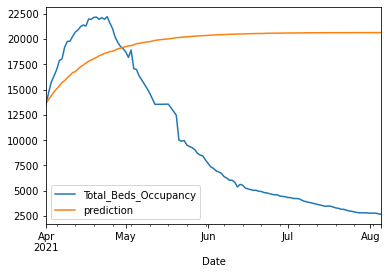

In [130]:
validation_df.plot()

<AxesSubplot:xlabel='Date'>

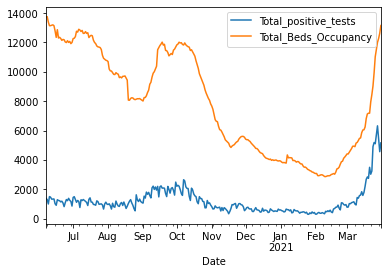

In [133]:
df_train[['Total_positive_tests','Total_Beds_Occupancy']].plot()

In [95]:
df

,Total_Bed_Capacity,Total_Beds_Occupancy,DCH & DCHC_ Bed_Capacity,DCH & DCHC_ Beds_Occupancy,CCC2_Active_Bed_Capacity,CCC2_Active_Bed_Occupancy,ICU_Bed_Capacity,ICU_Beds_Occupancy,O2_Bed_Capacity,O2_Beds_Occupancy,Ventilator_Bed_Capacity,Ventilator_Beds_Occupancy,non_ICU_Bed_Capacity,Total_positive_tests,Total_tests
Date,,,,,,,,,,,,,,,
2020-06-07,17936.0,13739.0,10531.0,9227.0,7405.0,4512.0,1157.0,1141.0,5114.0,3760.0,476.0,446.0,3957.0,1385.0,4954.0
2020-06-08,18110.0,13759.0,10702.0,9278.0,7408.0,4481.0,1164.0,1154.0,5946.0,4532.0,493.0,471.0,4782.0,1294.0,3671.0
2020-06-09,17835.0,13390.0,10314.0,9065.0,7521.0,4325.0,1158.0,1142.0,5181.0,3948.0,503.0,481.0,4023.0,999.0,4720.0
2020-06-10,17617.0,13143.0,10338.0,9030.0,7279.0,4113.0,1163.0,1152.0,5202.0,3905.0,507.0,483.0,4039.0,1505.0,4633.0
2020-06-11,17732.0,13146.0,10450.0,9098.0,7282.0,4048.0,1181.0,1167.0,5260.0,3986.0,530.0,497.0,4079.0,1458.0,4773.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,21308.0,2818.0,17617.0,2625.0,3691.0,205.0,2281.0,826.0,8776.0,1133.0,1293.0,535.0,6495.0,304.0,34202.0
2021-08-01,21289.0,2788.0,17598.0,2587.0,25214.0,201.0,2265.0,797.0,8769.0,1135.0,1291.0,513.0,6504.0,317.0,26768.0
2021-08-02,21289.0,2788.0,17598.0,2587.0,3691.0,201.0,2265.0,797.0,8769.0,1135.0,1291.0,513.0,6504.0,317.0,26768.0
